In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Venda em Varejo
<img src="https://files.nsctotal.com.br/s3fs-public/graphql-upload-files/P%C3%A1gina_TOP_Divulga%C3%A7%C3%A3o_Varejo.jpg?0E4nLroL8Td0Wcf.KRLiMVYmBcAEYUPI" width="400" height="100"/>

In [92]:
df = pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Big-Mart-Sales-Prediction/master/train.csv")
df.drop('Item_Identifier', axis=1, inplace=True)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Valor Vazio

<img src="https://www.logianalytics.com/wp-content/uploads/2019/06/Missing-values-2.png" width="250" height="100"/>

In [93]:
pd.isna(df).sum().to_frame("Valor Vazio")

,Valor Vazio
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


In [94]:
df.dropna(how='any',inplace=True)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...
8517,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Separar em Treino e Teste

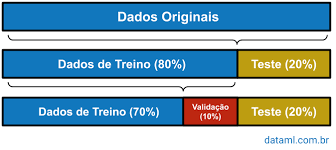

In [95]:
train , test = train_test_split(df,test_size=0.2,random_state=0)

# Separar a variável target das features (tanto do treino como do teste)
<img src="https://i.ibb.co/3csjYT2/image.png" width="400" height="100"/>

In [96]:
train_x = train.drop(columns=['Item_Outlet_Sales'],axis=1)
train_y = train['Item_Outlet_Sales']

In [97]:
test_x = test.drop(columns=['Item_Outlet_Sales'],axis=1)
test_y = test['Item_Outlet_Sales']

# Categóricas em numéricas

<img src="https://miro.medium.com/max/1879/1*O_pTwOZZLYZabRjw3Ga21A.png" width="600" height="100"/>

In [98]:
train_x = pd.get_dummies(train_x)
test_x  = pd.get_dummies(test_x)

## Treinar o modelo com os principais algorítimos supervisionados de Regressão

<img src="https://i.ibb.co/87M89qH/LR-LDA-DT-KNN-SVM-RF-1.png" width="200" height="80"/>

In [105]:
LR = LinearRegression().fit(train_x,train_y)
GLMNET = ElasticNet().fit(train_x,train_y)
CART = DecisionTreeRegressor().fit(train_x,train_y)
SVM = SVR().fit(train_x,train_y)
KNN = KNeighborsRegressor().fit(train_x,train_y)

In [106]:
predict_train_LR = LR.predict(train_x)
predict_test_LR = LR.predict(test_x)

predict_train_GLMNET = GLMNET.predict(train_x)
predict_test_GLMNET = GLMNET.predict(test_x)

predict_train_CART = CART.predict(train_x)
predict_test_CART = CART.predict(test_x)

predict_train_SVM = SVM.predict(train_x)
predict_test_SVM = SVM.predict(test_x)

predict_train_KNN = KNN.predict(train_x)
predict_test_KNN = KNN.predict(test_x)

In [107]:
test_y = pd.DataFrame(test_y)
test_y['predito_LR'] = predict_test_LR
test_y['predito_GLMNET'] = predict_test_GLMNET
test_y['predito_CART'] = predict_test_CART
test_y['predito_SVR'] = predict_test_SVM
test_y['predito_KNN'] = predict_test_KNN

In [108]:
test_y

,Item_Outlet_Sales,predito_LR,predito_GLMNET,predito_CART,predito_SVR,predito_KNN
6683,2283.0282,4088.392874,4108.411160,767.0016,1963.621984,3987.87568
2162,1312.9576,878.251709,1006.603612,1531.3400,1951.286654,818.66768
1647,360.8636,2502.723124,2647.491630,1253.7014,1958.514113,3118.07456
3332,1528.0110,2417.953413,2495.623911,4074.6960,1957.806730,2147.20500
1200,1151.1682,2630.546515,2630.340200,2631.2416,1957.419338,2553.07668
...,...,...,...,...,...,...
6433,2354.2688,2577.868386,2485.061793,1640.5312,1956.322559,2456.40252
155,3589.9936,3269.716759,3353.216587,1528.6768,1961.613737,3320.34460
5608,1565.9616,3209.643309,3151.512959,1565.9616,1959.696512,3709.43812
473,1713.7692,2267.567274,2159.264548,1186.4556,1955.219128,1995.00312


In [103]:
rmse_test_LR = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_LR'])**(0.5)
rmse_test_GLMNET = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_GLMNET'])**(0.5)
rmse_test_CART = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_CART'])**(0.5)
rmse_test_SVR = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_SVR'])**(0.5)
rmse_test_KNN = mean_squared_error(test_y['Item_Outlet_Sales'],test_y['predito_KNN'])**(0.5)

In [104]:
print('\nRMSE LR: ', rmse_test_RL)
print('\nRMSE GLMNET: ', rmse_test_GLMNET)
print('\nRMSE CART: ', rmse_test_CART)
print('\nRMSE SVR: ', rmse_test_SVR)
print('\nRMSE KNN: ', rmse_test_KNN)


RMSE LR:  1109.3776100390314

RMSE GLMNET:  1106.4039152726807

RMSE CART:  1558.8332814939517

RMSE SVR:  1546.5686150192744

RMSE KNN:  1224.3243950129227
